# Logistic Regression Assignment

- Run the below cells. If you have the data in a different directory, you'll need to change the url.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

In [26]:
# insert code
target_dist = df['left_company'].value_counts()
print(target_dist)

No     500
Yes    500
Name: left_company, dtype: int64


There is no class imbalance in the provided dataset.

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [27]:
numerical_vars = ['left_company',	'frequency_of_travel',	'department',	'education',	'satisfaction_with_environment',	'gender',	'position'	'satisfaction_with_job',	'married_or_single'	'last_raise_pct',	'last_performance_rating',	'total_years_working'	'years_at_company',	'years_in_current_job',	'years_since_last_promotion',	'years_with_current_supervisor']

categorical_vars = ['commuting_distance', 'age', 'education','satisfaction_with_environment','seniority_level']

print("Numerical Variables:\n", numerical_vars)
print("\nCategorical Variables:\n", categorical_vars)


Numerical Variables:
 ['left_company', 'frequency_of_travel', 'department', 'education', 'satisfaction_with_environment', 'gender', 'positionsatisfaction_with_job', 'married_or_singlelast_raise_pct', 'last_performance_rating', 'total_years_workingyears_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']

Categorical Variables:
 ['commuting_distance', 'age', 'education', 'satisfaction_with_environment', 'seniority_level']


## Insert comments here

I categorized the all the numerical termed columns to the Numerical and all the other categorical columns like gender department are into the categorical columns.

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

['age',
 'commuting_distance',
 'education',
 'satisfaction_with_environment',
 'satisfaction_with_job',
 'years_since_last_promotion']

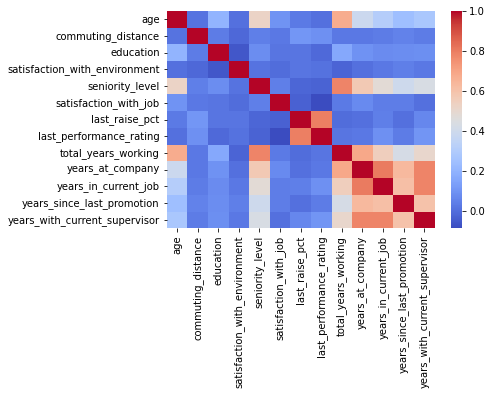

In [28]:
numerical_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_df = df[numerical_vars]

corr_matrix = numerical_df.corr()

import seaborn as sns
sns.heatmap(corr_matrix, cmap='coolwarm')

correlated_vars = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            col_i = corr_matrix.columns[i]
            col_j = corr_matrix.columns[j]
            correlated_vars.add(col_i)
            correlated_vars.add(col_j)

numerical_vars = [col for col in numerical_vars if col not in correlated_vars]
numerical_vars

Insert comments here

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('left_company', axis=1)
y = df['left_company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set shape:', X_train.shape, y_train.shape)
print('Test set shape:', X_test.shape, y_test.shape)


Training set shape: (800, 18) (800,)
Test set shape: (200, 18) (200,)


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [30]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_vars),
    ('cat', categorical_transformer, categorical_vars)
])

X_train_processed = preprocessor.fit_transform(X_train)

print("Numerical features shape:", X_train_processed[:, :len(numerical_vars)].shape)
print("Categorical features shape:", X_train_processed[:, len(numerical_vars):].shape)


Numerical features shape: (800, 6)
Categorical features shape: (800, 86)


# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [31]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])

In [32]:
from sklearn.compose import ColumnTransformer
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [33]:
print('Training accuracy: {:.2f}'.format(accuracy_score(y_train, y_pred_train)))
print('Test accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_test)))

Training accuracy: 0.75
Test accuracy: 0.70


## Insert comments here

Because there is no statistically significant difference between training and test accuracy scores, I didn't see any big worries regarding overfitting. However, we might want to experiment with various models or tweak the hyperparameters to see if we can increase the test accuracy score.

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

Insert comments here

Consider developing new features or altering existing ones to better capture connections in data. You might, for example, experiment with merging numerous characteristics or developing interaction words. This can frequently result in increased model performance.

Model selection: Experiment with several models or methods to discover which one works best on your data. Decision trees, random forests, support vector machines (SVMs), and neural networks are some prominent approaches for categorization challenges.

When you've chosen a model, experiment with altering its hyperparameters to see if you can increase performance. Hyperparameters are settings that are defined by the user rather than learnt from data, such as the learning rate of a neural network or the maximum depth of a decision tree.

Try creating new features or modifying existing ones to better collect data linkages. You might, for example, experiment with combining many features or creating interaction words. This typically leads to improved model performance.

Try with different models or methodologies to see which one works best with your data. Some popular techniques for classification problems include decision trees, random forests, support vector machines (SVMs), and neural networks.

When you've decided on a model, play around with its hyperparameters to see if you can improve performance. Such as the learning rate of a neural network or the maximum depth of a decision tree, hyperparameters are variables that are established by the user rather than learned from data.